# Downloading dataset from Google Drive and Unzipping it

In [1]:
!gdown --id "1N4XzmuU1xeI_qW3Ka4b-lI0eWF68jVwi"

Downloading...
From: https://drive.google.com/uc?id=1N4XzmuU1xeI_qW3Ka4b-lI0eWF68jVwi
To: /content/csc532.zip
463MB [00:04, 108MB/s]


In [2]:
!unzip "/content/csc532.zip" -d "/content/"

Archive:  /content/csc532.zip
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (10).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (100).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (101).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (102).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (103).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (104).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (105).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (106).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (107).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (108).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (109).jpg  
  inflating: /content/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (11).jpg  
  inflating:

# Importing Libraries

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Using ImageDataGenerator to get the training and test set

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )
training_set = train_datagen.flow_from_directory(
        'datasets/datasets/train',
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')

Found 676 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'datasets/datasets/test',
        target_size=(250, 250),
        batch_size=32,
        class_mode='binary')

Found 408 images belonging to 2 classes.


# CNN Models

## Model 1

In [10]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(250,250,3)),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [11]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 246, 246, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 60, 64)       

In [12]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [13]:
r = cnn.fit(training_set, validation_data = test_set, epochs=50)

Epoch 1/50
22/22 [==============================] - 33s 1s/step - loss: 2.1269 - accuracy: 0.7544 - auc: 0.5551 - val_loss: 0.6382 - val_accuracy: 0.7108 - val_auc: 0.8133
Epoch 2/50
22/22 [==============================] - 29s 1s/step - loss: 0.4957 - accuracy: 0.8062 - auc: 0.5835 - val_loss: 0.5336 - val_accuracy: 0.7108 - val_auc: 0.8037
Epoch 3/50
22/22 [==============================] - 30s 1s/step - loss: 0.3760 - accuracy: 0.8284 - auc: 0.8301 - val_loss: 0.5187 - val_accuracy: 0.7475 - val_auc: 0.8423
Epoch 4/50
22/22 [==============================] - 29s 1s/step - loss: 0.3116 - accuracy: 0.8550 - auc: 0.8876 - val_loss: 0.5010 - val_accuracy: 0.8015 - val_auc: 0.8460
Epoch 5/50
22/22 [==============================] - 30s 1s/step - loss: 0.2722 - accuracy: 0.8580 - auc: 0.9213 - val_loss: 0.4425 - val_accuracy: 0.8333 - val_auc: 0.8934
Epoch 6/50
22/22 [==============================] - 30s 1s/step - loss: 0.2582 - accuracy: 0.8713 - auc: 0.9285 - val_loss: 0.6150 - val_acc

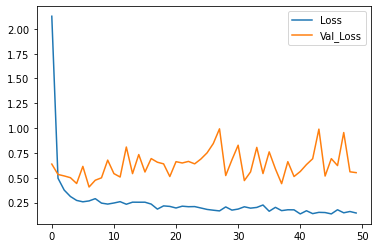

In [14]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()

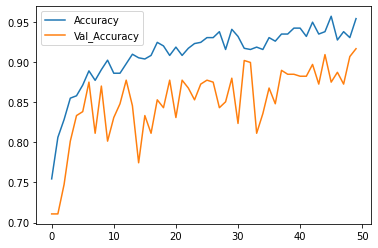

In [15]:
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

In [16]:
test_loss, test_accuracy, test_auc = cnn.evaluate(test_set)

13/13 [==============================] - 8s 569ms/step - loss: 0.5519 - accuracy: 0.9167 - auc: 0.9008


Although the model gives us great accuracy and AUC score, the model seems to be overfitting early on.

## Model 2

In the second model, we try to increase the complexity of the model by increasing the filters of the Convulation layer and units of the Dense layer.

In [ ]:
cnn2 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(250,250,3)),
    MaxPool2D(pool_size = 2, strides=2),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(units=512, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
cnn2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 124, 124, 64)      0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 61, 61, 128)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 59, 59, 128)      

In [ ]:
cnn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC'])

In [ ]:
r2 = cnn2.fit(training_set, validation_data = test_set, epochs=20)

Epoch 1/20
22/22 [==============================] - 116s 5s/step - loss: 0.2478 - accuracy: 0.8891 - auc: 0.9301 - val_loss: 1.0812 - val_accuracy: 0.8260 - val_auc: 0.8196
Epoch 2/20
22/22 [==============================] - 158s 7s/step - loss: 0.2020 - accuracy: 0.9172 - auc: 0.9558 - val_loss: 1.0521 - val_accuracy: 0.8235 - val_auc: 0.8326
Epoch 3/20
22/22 [==============================] - 149s 7s/step - loss: 0.1834 - accuracy: 0.9231 - auc: 0.9666 - val_loss: 1.0954 - val_accuracy: 0.8725 - val_auc: 0.8449
Epoch 4/20
22/22 [==============================] - 143s 6s/step - loss: 0.1731 - accuracy: 0.9260 - auc: 0.9701 - val_loss: 1.0635 - val_accuracy: 0.8603 - val_auc: 0.8380
Epoch 5/20
22/22 [==============================] - 142s 6s/step - loss: 0.1887 - accuracy: 0.9231 - auc: 0.9626 - val_loss: 0.8488 - val_accuracy: 0.8701 - val_auc: 0.8340
Epoch 6/20
22/22 [==============================] - 147s 7s/step - loss: 0.1943 - accuracy: 0.9379 - auc: 0.9617 - val_loss: 0.9837 - v

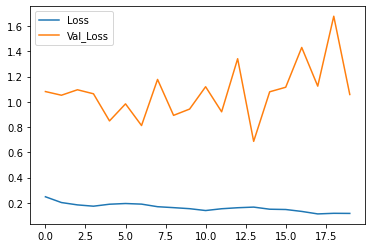

In [ ]:
plt.plot(r2.history['loss'], label='Loss')
plt.plot(r2.history['val_loss'], label='Val_Loss')
plt.legend()

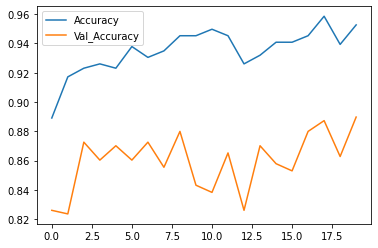

In [ ]:
plt.plot(r2.history['accuracy'], label='Accuracy')
plt.plot(r2.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

The model seems to be overfitting from the very start.

## Model 3

In the third model, we try to reduce the number of layers.

In [17]:
cnn3 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(250,250,3)),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(units=256, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [18]:
cnn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [19]:
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 61, 61, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 476288)           

In [20]:
r3 = cnn3.fit(training_set, validation_data = test_set, epochs=10)

Epoch 1/10
22/22 [==============================] - 33s 1s/step - loss: 3.2063 - accuracy: 0.7781 - auc: 0.5719 - val_loss: 0.6296 - val_accuracy: 0.7108 - val_auc: 0.6821
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 0.4112 - accuracy: 0.8151 - auc: 0.7786 - val_loss: 0.5567 - val_accuracy: 0.7279 - val_auc: 0.7478
Epoch 3/10
22/22 [==============================] - 30s 1s/step - loss: 0.3322 - accuracy: 0.8609 - auc: 0.8672 - val_loss: 0.5472 - val_accuracy: 0.8358 - val_auc: 0.8469
Epoch 4/10
22/22 [==============================] - 30s 1s/step - loss: 0.2987 - accuracy: 0.8698 - auc: 0.8985 - val_loss: 0.5913 - val_accuracy: 0.7892 - val_auc: 0.7826
Epoch 5/10
22/22 [==============================] - 30s 1s/step - loss: 0.3133 - accuracy: 0.8846 - auc: 0.8840 - val_loss: 0.7751 - val_accuracy: 0.8088 - val_auc: 0.7984
Epoch 6/10
22/22 [==============================] - 30s 1s/step - loss: 0.2530 - accuracy: 0.8994 - auc: 0.9297 - val_loss: 0.9845 - val_acc

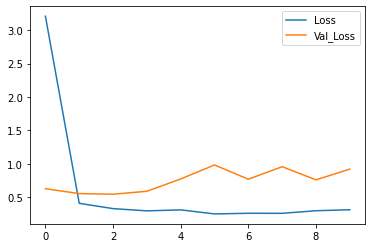

In [21]:
plt.plot(r3.history['loss'], label='Loss')
plt.plot(r3.history['val_loss'], label='Val_Loss')
plt.legend()

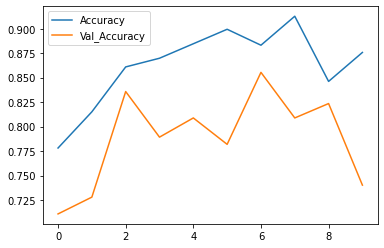

In [22]:
plt.plot(r3.history['accuracy'], label='Accuracy')
plt.plot(r3.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

Again, this model is not giving us the convergence that we'd like from our CNN model, neither good accuracy.

## Model 4

In this model, we increase the number of Dense Layers to improve the performance.

In [23]:
cnn4 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(250,250,3)),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Flatten(),
    
    Dense(units=256, activation='relu'),
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [24]:
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 61, 61, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 476288)           

In [25]:
cnn4.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

In [26]:
r4 = cnn4.fit(training_set, validation_data = test_set, epochs=20)

Epoch 1/20
22/22 [==============================] - 32s 1s/step - loss: 4.2716 - accuracy: 0.7175 - auc: 0.4927 - val_loss: 0.6449 - val_accuracy: 0.7108 - val_auc: 0.6106
Epoch 2/20
22/22 [==============================] - 30s 1s/step - loss: 0.4643 - accuracy: 0.8151 - auc: 0.6694 - val_loss: 0.7108 - val_accuracy: 0.7108 - val_auc: 0.6960
Epoch 3/20
22/22 [==============================] - 30s 1s/step - loss: 0.3651 - accuracy: 0.8506 - auc: 0.8445 - val_loss: 0.6056 - val_accuracy: 0.7328 - val_auc: 0.7653
Epoch 4/20
22/22 [==============================] - 30s 1s/step - loss: 0.3051 - accuracy: 0.8772 - auc: 0.8916 - val_loss: 0.6016 - val_accuracy: 0.8529 - val_auc: 0.8299
Epoch 5/20
22/22 [==============================] - 30s 1s/step - loss: 0.3732 - accuracy: 0.8402 - auc: 0.8313 - val_loss: 0.7966 - val_accuracy: 0.7132 - val_auc: 0.7177
Epoch 6/20
22/22 [==============================] - 30s 1s/step - loss: 0.3554 - accuracy: 0.8609 - auc: 0.8543 - val_loss: 0.6206 - val_acc

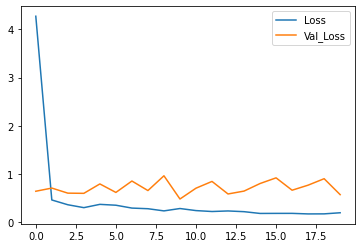

In [27]:
plt.plot(r4.history['loss'], label='Loss')
plt.plot(r4.history['val_loss'], label='Val_Loss')
plt.legend()

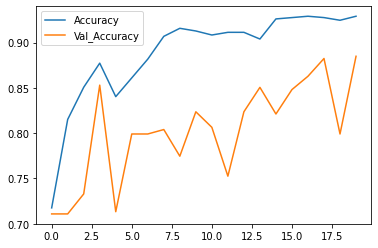

In [28]:
plt.plot(r4.history['accuracy'], label='Accuracy')
plt.plot(r4.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

## Model 5

Our val_accuracy/loss is fluctuating a lot. We will try to fix this by changing the model structure completely, introdue a learning rate scheduler to slow down the learning rate and using a different activation function.

#### Defining a learning rate scheduler that reduces the learning from 0.001 to 0.0001 after the 10th epoch.

In [71]:
def schedule(epoch, lr):
    if epoch >=10:
        return 0.0001
    else:
        return 0.001

In [72]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [81]:
cnn5 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='elu', input_shape=(250,250,3)),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=32, kernel_size=3, activation='elu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=3, activation='elu'),
    MaxPool2D(),
    Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=3, activation='elu'),
    MaxPool2D(),
    Dropout(0.5),
    
    Conv2D(filters=128, kernel_size=3, activation='elu'),
    MaxPool2D(),
    Dropout(0.5),
    
    Flatten(),
    
    Dense(units=256, activation='elu'),
    Dense(units=128, activation='elu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

In [82]:
cnn5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 59, 59, 64)      

In [93]:
opt = tf.keras.optimizers.Adam(0.001)

In [84]:
cnn5.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])    

In [85]:
r5 = cnn5.fit(training_set, validation_data=test_set, epochs=20, callbacks=[scheduler])

Epoch 1/20
22/22 [==============================] - 30s 1s/step - loss: 0.6958 - accuracy: 0.7426 - auc: 0.5039 - val_loss: 0.5949 - val_accuracy: 0.7108 - val_auc: 0.7594
Epoch 2/20
22/22 [==============================] - 29s 1s/step - loss: 0.4894 - accuracy: 0.8121 - auc: 0.5644 - val_loss: 0.9472 - val_accuracy: 0.2892 - val_auc: 0.4822
Epoch 3/20
22/22 [==============================] - 29s 1s/step - loss: 0.4708 - accuracy: 0.8092 - auc: 0.6398 - val_loss: 0.7003 - val_accuracy: 0.3775 - val_auc: 0.8918
Epoch 4/20
22/22 [==============================] - 29s 1s/step - loss: 0.4543 - accuracy: 0.8077 - auc: 0.7019 - val_loss: 0.6530 - val_accuracy: 0.6005 - val_auc: 0.8153
Epoch 5/20
22/22 [==============================] - 29s 1s/step - loss: 0.3360 - accuracy: 0.8669 - auc: 0.8685 - val_loss: 0.8558 - val_accuracy: 0.4461 - val_auc: 0.7861
Epoch 6/20
22/22 [==============================] - 29s 1s/step - loss: 0.3682 - accuracy: 0.8402 - auc: 0.8394 - val_loss: 0.3481 - val_acc

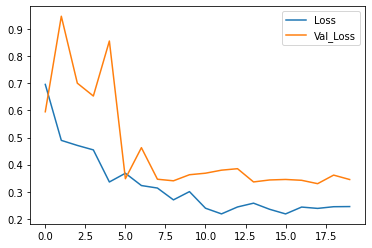

In [86]:
plt.plot(r5.history['loss'], label='Loss')
plt.plot(r5.history['val_loss'], label='Val_Loss')
plt.legend()

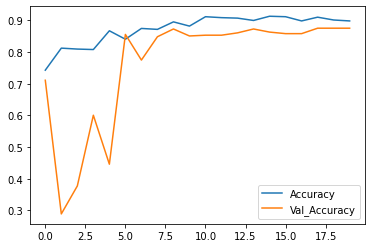

In [87]:
plt.plot(r5.history['accuracy'], label='Accuracy')
plt.plot(r5.history['val_accuracy'], label='Val_Accuracy')
plt.legend()

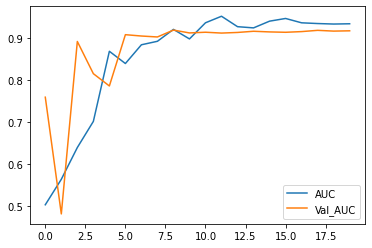

In [88]:
plt.plot(r5.history['auc'], label='AUC')
plt.plot(r5.history['val_auc'], label='Val_AUC')
plt.legend()

In [89]:
test_loss, test_accuracy, test_auc = cnn5.evaluate(test_set)

13/13 [==============================] - 8s 564ms/step - loss: 0.3451 - accuracy: 0.8750 - auc: 0.9171


This is the sort of converging graphs we were looking for from our model. It also gives us a great **accuracy of 87.5% and AUC score of 91.7%.**